In [1]:
import itertools
import pandas as pd
import datetime as dt
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web

from scipy import stats

In [2]:
#let's start by getting dates for our dataframe
end = dt.date.today()
start = dt.date(end.year - 10, end.month, end.day)

In [3]:
#we'll start with using S&P 500 which use the ticker ^GSPC
spx = yf.download("^GSPC", start, end)
spx.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-27,1318.250000,1320.060059,1311.719971,1316.329956,1316.329956,4007380000
2012-01-30,1316.160034,1316.160034,1300.489990,1313.010010,1313.010010,3659010000
2012-01-31,1313.530029,1321.410034,1306.689941,1312.410034,1312.410034,4235550000
2012-02-01,1312.449951,1330.520020,1312.449951,1324.089966,1324.089966,4504360000
2012-02-02,1324.239990,1329.189941,1321.569946,1325.540039,1325.540039,4120920000


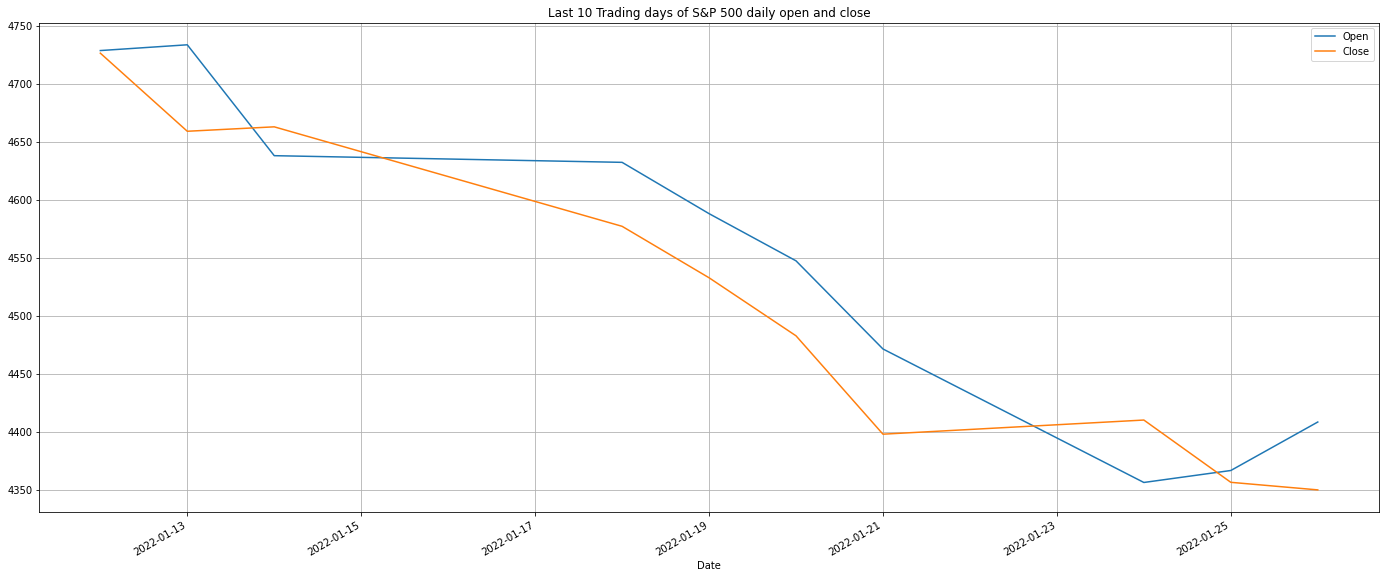

In [4]:
#let's first look at what we are given open and close is the price of the stock when it opens and closes with the market
spx[["Open", "Close"]].tail(10).plot(figsize = (24,10))
plt.title("Last 10 Trading days of S&P 500 daily open and close")
plt.grid()
plt.show()

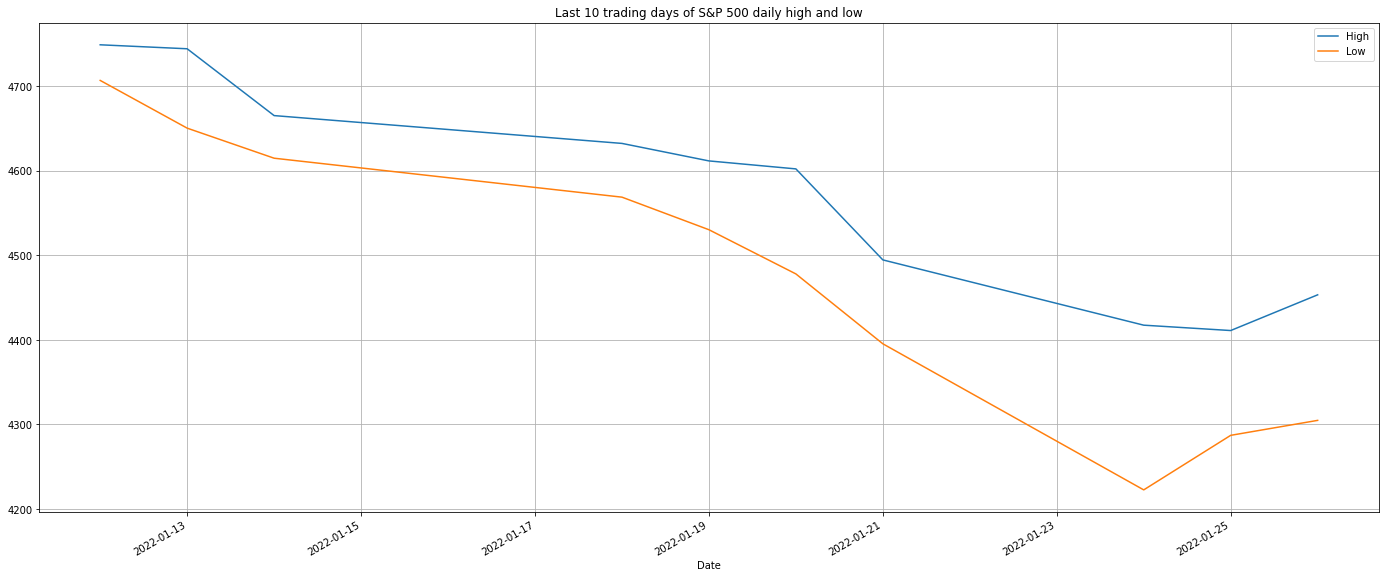

In [5]:
#we can also look at the high and the low which is the 
spx[["High", "Low"]].tail(10).plot(figsize = (24,10))
plt.title("Last 10 trading days of S&P 500 daily high and low")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


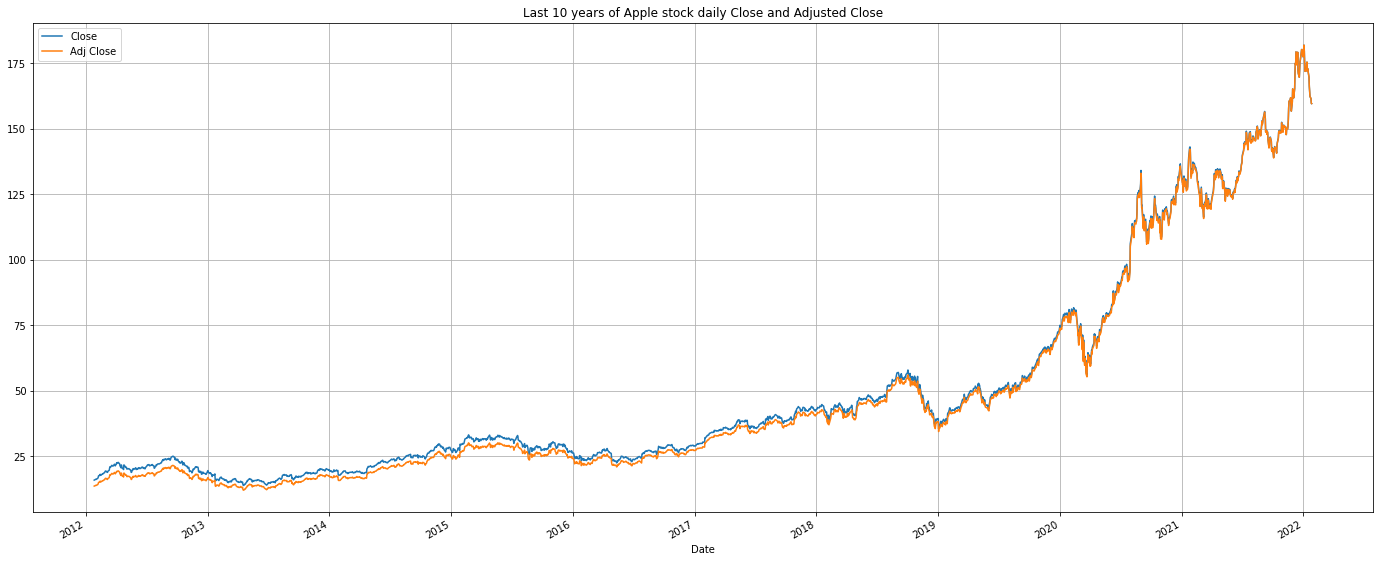

In [6]:
#let's compare adjusted close with close, in this case I'll use a stock 
yf.download("aapl", start, end)[["Close", "Adj Close"]].plot(figsize = (24,10))
plt.title("Last 10 years of Apple stock daily Close and Adjusted Close")
plt.grid()
plt.show()

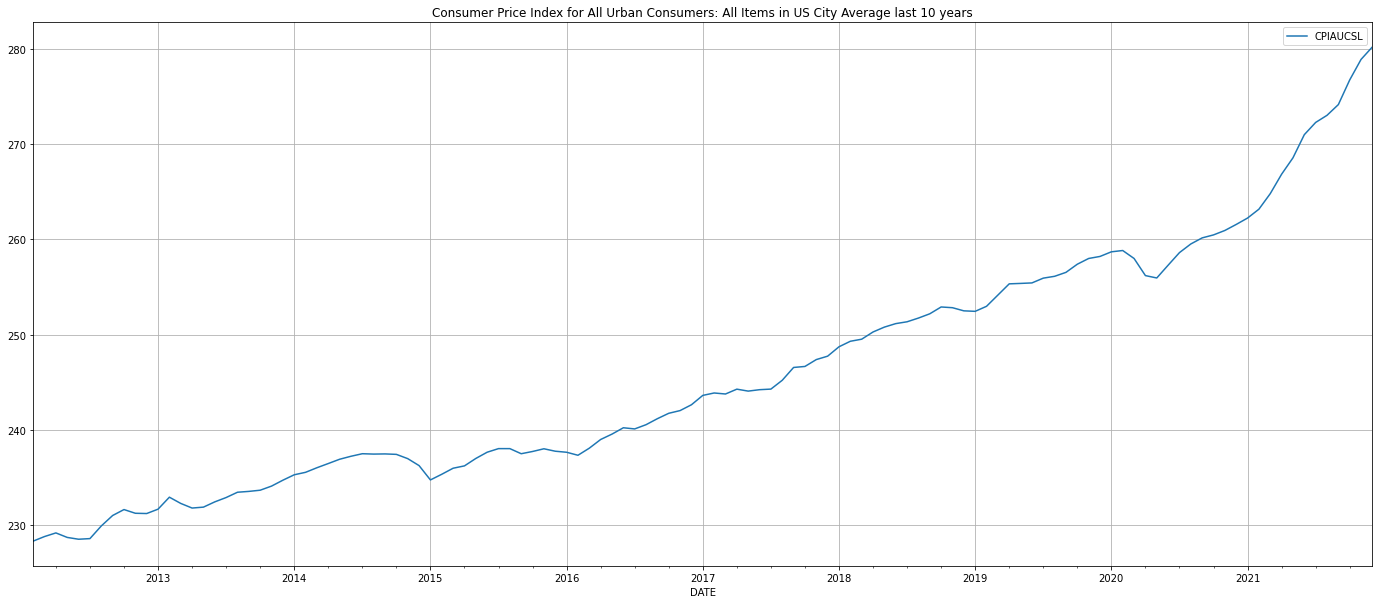

In [7]:
#let's work with pandas_datareader this allows us to pull from other sources such as IMF, OECD, and FRED
#Let's get the CPI rate from FRED

cpi = web.DataReader("CPIAUCSL", "fred", start, end)
cpi.plot(figsize = (24,10))
plt.title("Consumer Price Index for All Urban Consumers: All Items in US City Average last 10 years")
plt.grid()
plt.show()

In [8]:
def colorado_cut():
    
    read_obj = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    df = read_obj[0]
    
    city = []
    state = []
    
    for i in df["Headquarters Location"]:
        
        i = i.split(",")
        city.append(i[0])
        state.append(i[1])
        
    data_dict = {"Symbol": df["Symbol"], "City": city, "State": state}
    output_df = pd.DataFrame(data = data_dict)
    
    for index, i in enumerate(output_df["State"]):
        
        if i.replace(" ", "") != "Colorado":
            output_df = output_df.drop(index)
            
            
    return output_df

In [9]:
# this will return us with the colorado companies
try:
    df = colorado_cut()
    df.head()
    
except:
    
    print("pass")
    pass

pass


In [10]:
#now we can get all of the stocks by passing the values as a list
#df["Symbol"]

In [11]:
# = yf.download(df["Symbol"].to_list(), start, end)["Adj Close"]
prices = pd.read_csv("colorado_companies.csv", index_col = 0)
prices.head()

,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
1/17/2012,17.024654,28.313940,39.365002,49.844727,17.513321,24.881508
1/18/2012,17.276773,28.275019,39.224998,49.362137,17.719780,24.994028
1/19/2012,17.487638,29.179897,39.875000,48.748688,17.570272,24.960276
1/20/2012,17.377617,28.080423,39.884998,48.478771,17.491962,25.042797
1/23/2012,17.322611,27.856634,40.220001,48.470589,17.484842,24.817741


In [12]:
prices.to_csv("colorado_companies.csv")

In [13]:
#let's simulate a portfolio in this case we are going to evenly invest the money

#start an allocation array 
allocation_array = [1 / len(prices.columns) for i in range(len(prices.columns))]
allocation_array

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [14]:
#then multiply the returns by the allocation array
portfolio_return = prices.pct_change().dropna() * allocation_array
portfolio_return.head()

,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
1/18/2012,0.002468,-0.000229,-0.000593,-0.001614,0.001965,0.000754
1/19/2012,0.002034,0.005334,0.002762,-0.002071,-0.001406,-0.000225
1/20/2012,-0.001049,-0.006280,0.000042,-0.000923,-0.000743,0.000551
1/23/2012,-0.000528,-0.001328,0.001400,-0.000028,-0.000068,-0.001498
1/24/2012,-0.000176,0.001281,0.000891,-0.005006,0.003325,0.000290


In [15]:
portfolio_return["total_return"] = portfolio_return.sum(axis = 1)
portfolio_return.head()

,BLL,DISH,DVA,NEM,UDR,VFC,total_return
Date,,,,,,,
1/18/2012,0.002468,-0.000229,-0.000593,-0.001614,0.001965,0.000754,0.002751
1/19/2012,0.002034,0.005334,0.002762,-0.002071,-0.001406,-0.000225,0.006427
1/20/2012,-0.001049,-0.006280,0.000042,-0.000923,-0.000743,0.000551,-0.008401
1/23/2012,-0.000528,-0.001328,0.001400,-0.000028,-0.000068,-0.001498,-0.002050
1/24/2012,-0.000176,0.001281,0.000891,-0.005006,0.003325,0.000290,0.000604


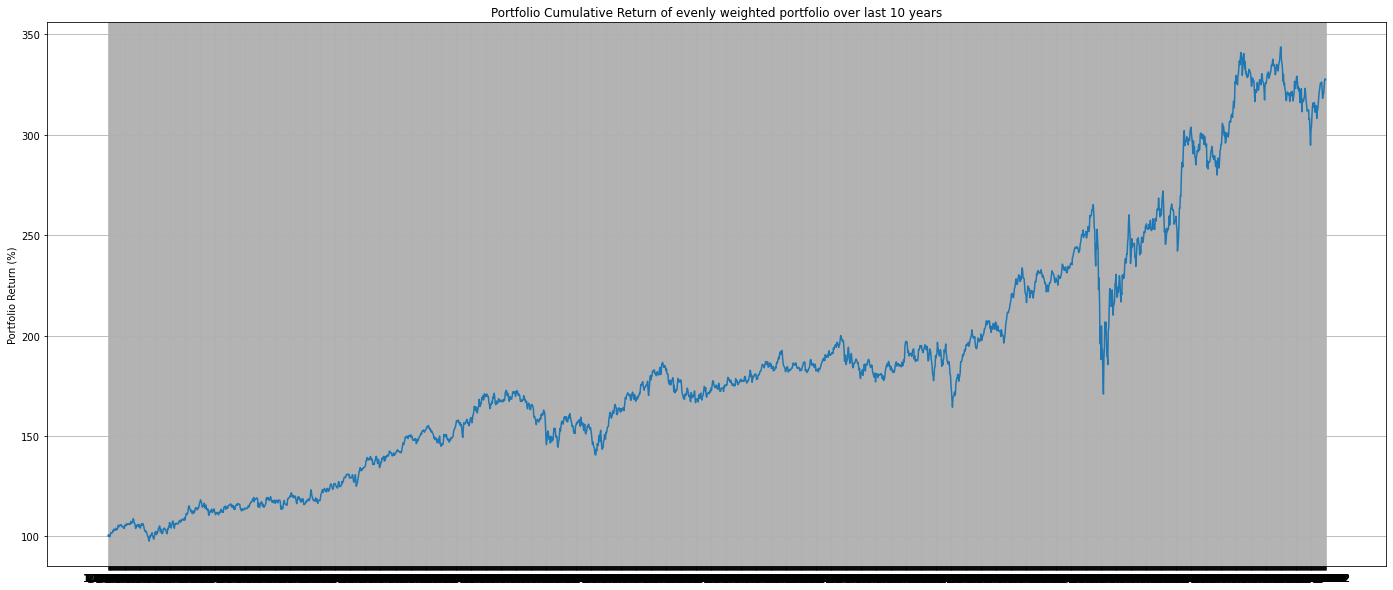

In [16]:
plt.figure(figsize = (24,10))
plt.plot((portfolio_return["total_return"] + 1).cumprod() * 100)
plt.title("Portfolio Cumulative Return of evenly weighted portfolio over last 10 years")
plt.ylabel("Portfolio Return (%)")
plt.grid()
plt.show()

In [17]:
#let's start by keeping track of the portfolio value

#instead of multiplying the returns by the allocation size we'll multiply the stock by the number of shares
#to find the number of shares we need to find how many we are going to buy

starting_capital = 100000
share_array = []

#we want to loop through each column get the amount of starting cash and divide by first share price
for i in prices.columns:
    share_array.append((starting_capital / len(prices.columns)) / prices[i][0])
    
#we are going to get something that is impossible because we end up with fractional shares
share_array

[978.9723940860963,
 588.6381986129362,
 423.3879323097915,
 334.371714259569,
 951.6565557611369,
 669.841504532043]

In [18]:
#let's multiply the share price by the number of shares and then get the total value
portfolio_value = prices * share_array
portfolio_value["sum"] = portfolio_value.sum(axis = 1)
portfolio_value.head()

,BLL,DISH,DVA,NEM,UDR,VFC,sum
Date,,,,,,,
1/17/2012,16666.666667,16666.666667,16666.666667,16666.666667,16666.666667,16666.666667,100000.000000
1/18/2012,16913.484266,16643.756067,16607.390997,16505.302315,16863.144775,16742.037380,100275.115801
1/19/2012,17119.915300,17176.402188,16882.593801,16300.182288,16720.864964,16719.428595,100919.387135
1/20/2012,17012.207201,16529.209823,16886.826969,16209.929835,16646.340720,16774.704880,100059.219427
1/23/2012,16958.357825,16397.478940,17028.663154,16207.193828,16639.564801,16623.953232,99855.211780


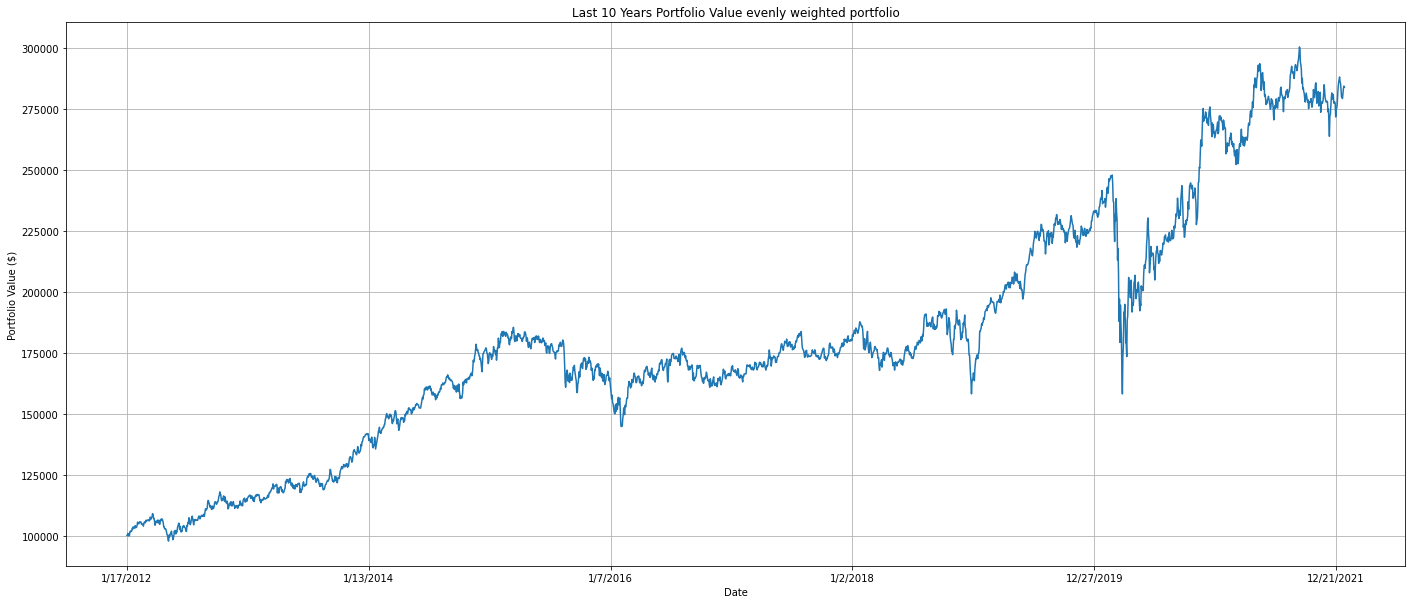

In [19]:
portfolio_value["sum"].plot(figsize = (24,10))
plt.title("Last 10 Years Portfolio Value evenly weighted portfolio")
plt.grid()
plt.ylabel("Portfolio Value ($)")
plt.show()

In [20]:
len(portfolio_return)

2517

In [21]:
#let's compare values
print("final portfolio value:", portfolio_value["sum"][len(portfolio_value) - 1])
print("final return value:", (portfolio_return["total_return"] + 1).cumprod()[len(portfolio_return) - 1] * 100000) 

final portfolio value: 283850.7335932102
final return value: 327490.58464793756


In [22]:
#you can see we have a problem because they are off, actually they are off by too much 

#let's fix that by finding the value of the portfolio using just the close price
prices = yf.download(prices.columns.to_list(), start, end)["Close"]
prices.head()

[*********************100%***********************]  6 of 6 completed


,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
2012-01-27,19.719999,27.639999,40.575001,61.509998,26.010000,30.793316
2012-01-30,19.590000,28.410000,40.700001,61.220001,25.809999,30.838041
2012-01-31,19.629999,27.920000,40.904999,61.480000,26.020000,30.953390
2012-02-01,20.160000,28.430000,41.945000,61.119999,26.120001,30.743879
2012-02-02,19.850000,28.370001,41.435001,62.290001,26.090000,30.593220


In [23]:
portfolio_return = prices.pct_change().dropna() * allocation_array
portfolio_return["total_return"] = portfolio_return.sum(axis = 1)
print((portfolio_return["total_return"] + 1).cumprod()[len(portfolio_return) - 1] * 100000)

260861.44247077132


In [24]:
#so you may ask yourself where do we get the portfolio with $323,000 that comes from reinvesting the dividends
#what we did was get the initial value of the stock on the start day and kept it but as we reinvest the dividends
#the number of shares will change as we reinvest the dividends therefore you have to update the portfolio 
#in real life you wouldn't always reinvest the dividends because it would lead to fractional shares
#this means after each transaction period you need to change the number of shares

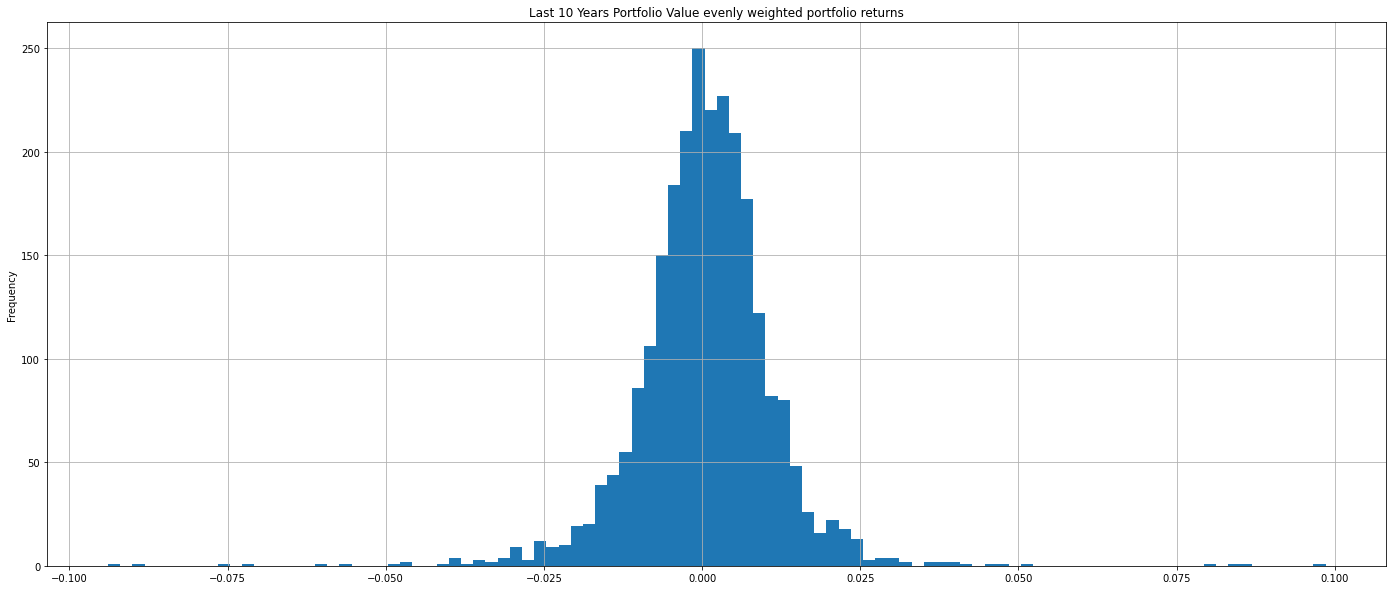

In [25]:
#let's look at the distribution of the portfolio
plt.figure(figsize = (24,10))
portfolio_value["sum"].pct_change().plot(kind = "hist", bins = 100)
plt.title("Last 10 Years Portfolio Value evenly weighted portfolio returns")
plt.grid()
plt.show()

In [26]:
#something that we are interested in is the underlying performance of each stock
#we first need the returns of the stock
prices_returns = prices.pct_change().dropna()
prices_returns.head()

,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
2012-01-30,-0.006592,0.027858,0.003081,-0.004715,-0.007689,0.001452
2012-01-31,0.002042,-0.017247,0.005037,0.004247,0.008136,0.003740
2012-02-01,0.027000,0.018266,0.025425,-0.005856,0.003843,-0.006769
2012-02-02,-0.015377,-0.002110,-0.012159,0.019143,-0.001149,-0.004900
2012-02-03,0.002519,0.019034,0.012670,-0.020549,0.014182,0.026393


In [27]:
#now we are going to compare all of the stocks agianst themselves to do that we'll use the itertools
combinations = list(itertools.combinations(prices_returns.columns, 2))
combinations

[('BLL', 'DISH'),
 ('BLL', 'DVA'),
 ('BLL', 'NEM'),
 ('BLL', 'UDR'),
 ('BLL', 'VFC'),
 ('DISH', 'DVA'),
 ('DISH', 'NEM'),
 ('DISH', 'UDR'),
 ('DISH', 'VFC'),
 ('DVA', 'NEM'),
 ('DVA', 'UDR'),
 ('DVA', 'VFC'),
 ('NEM', 'UDR'),
 ('NEM', 'VFC'),
 ('UDR', 'VFC')]

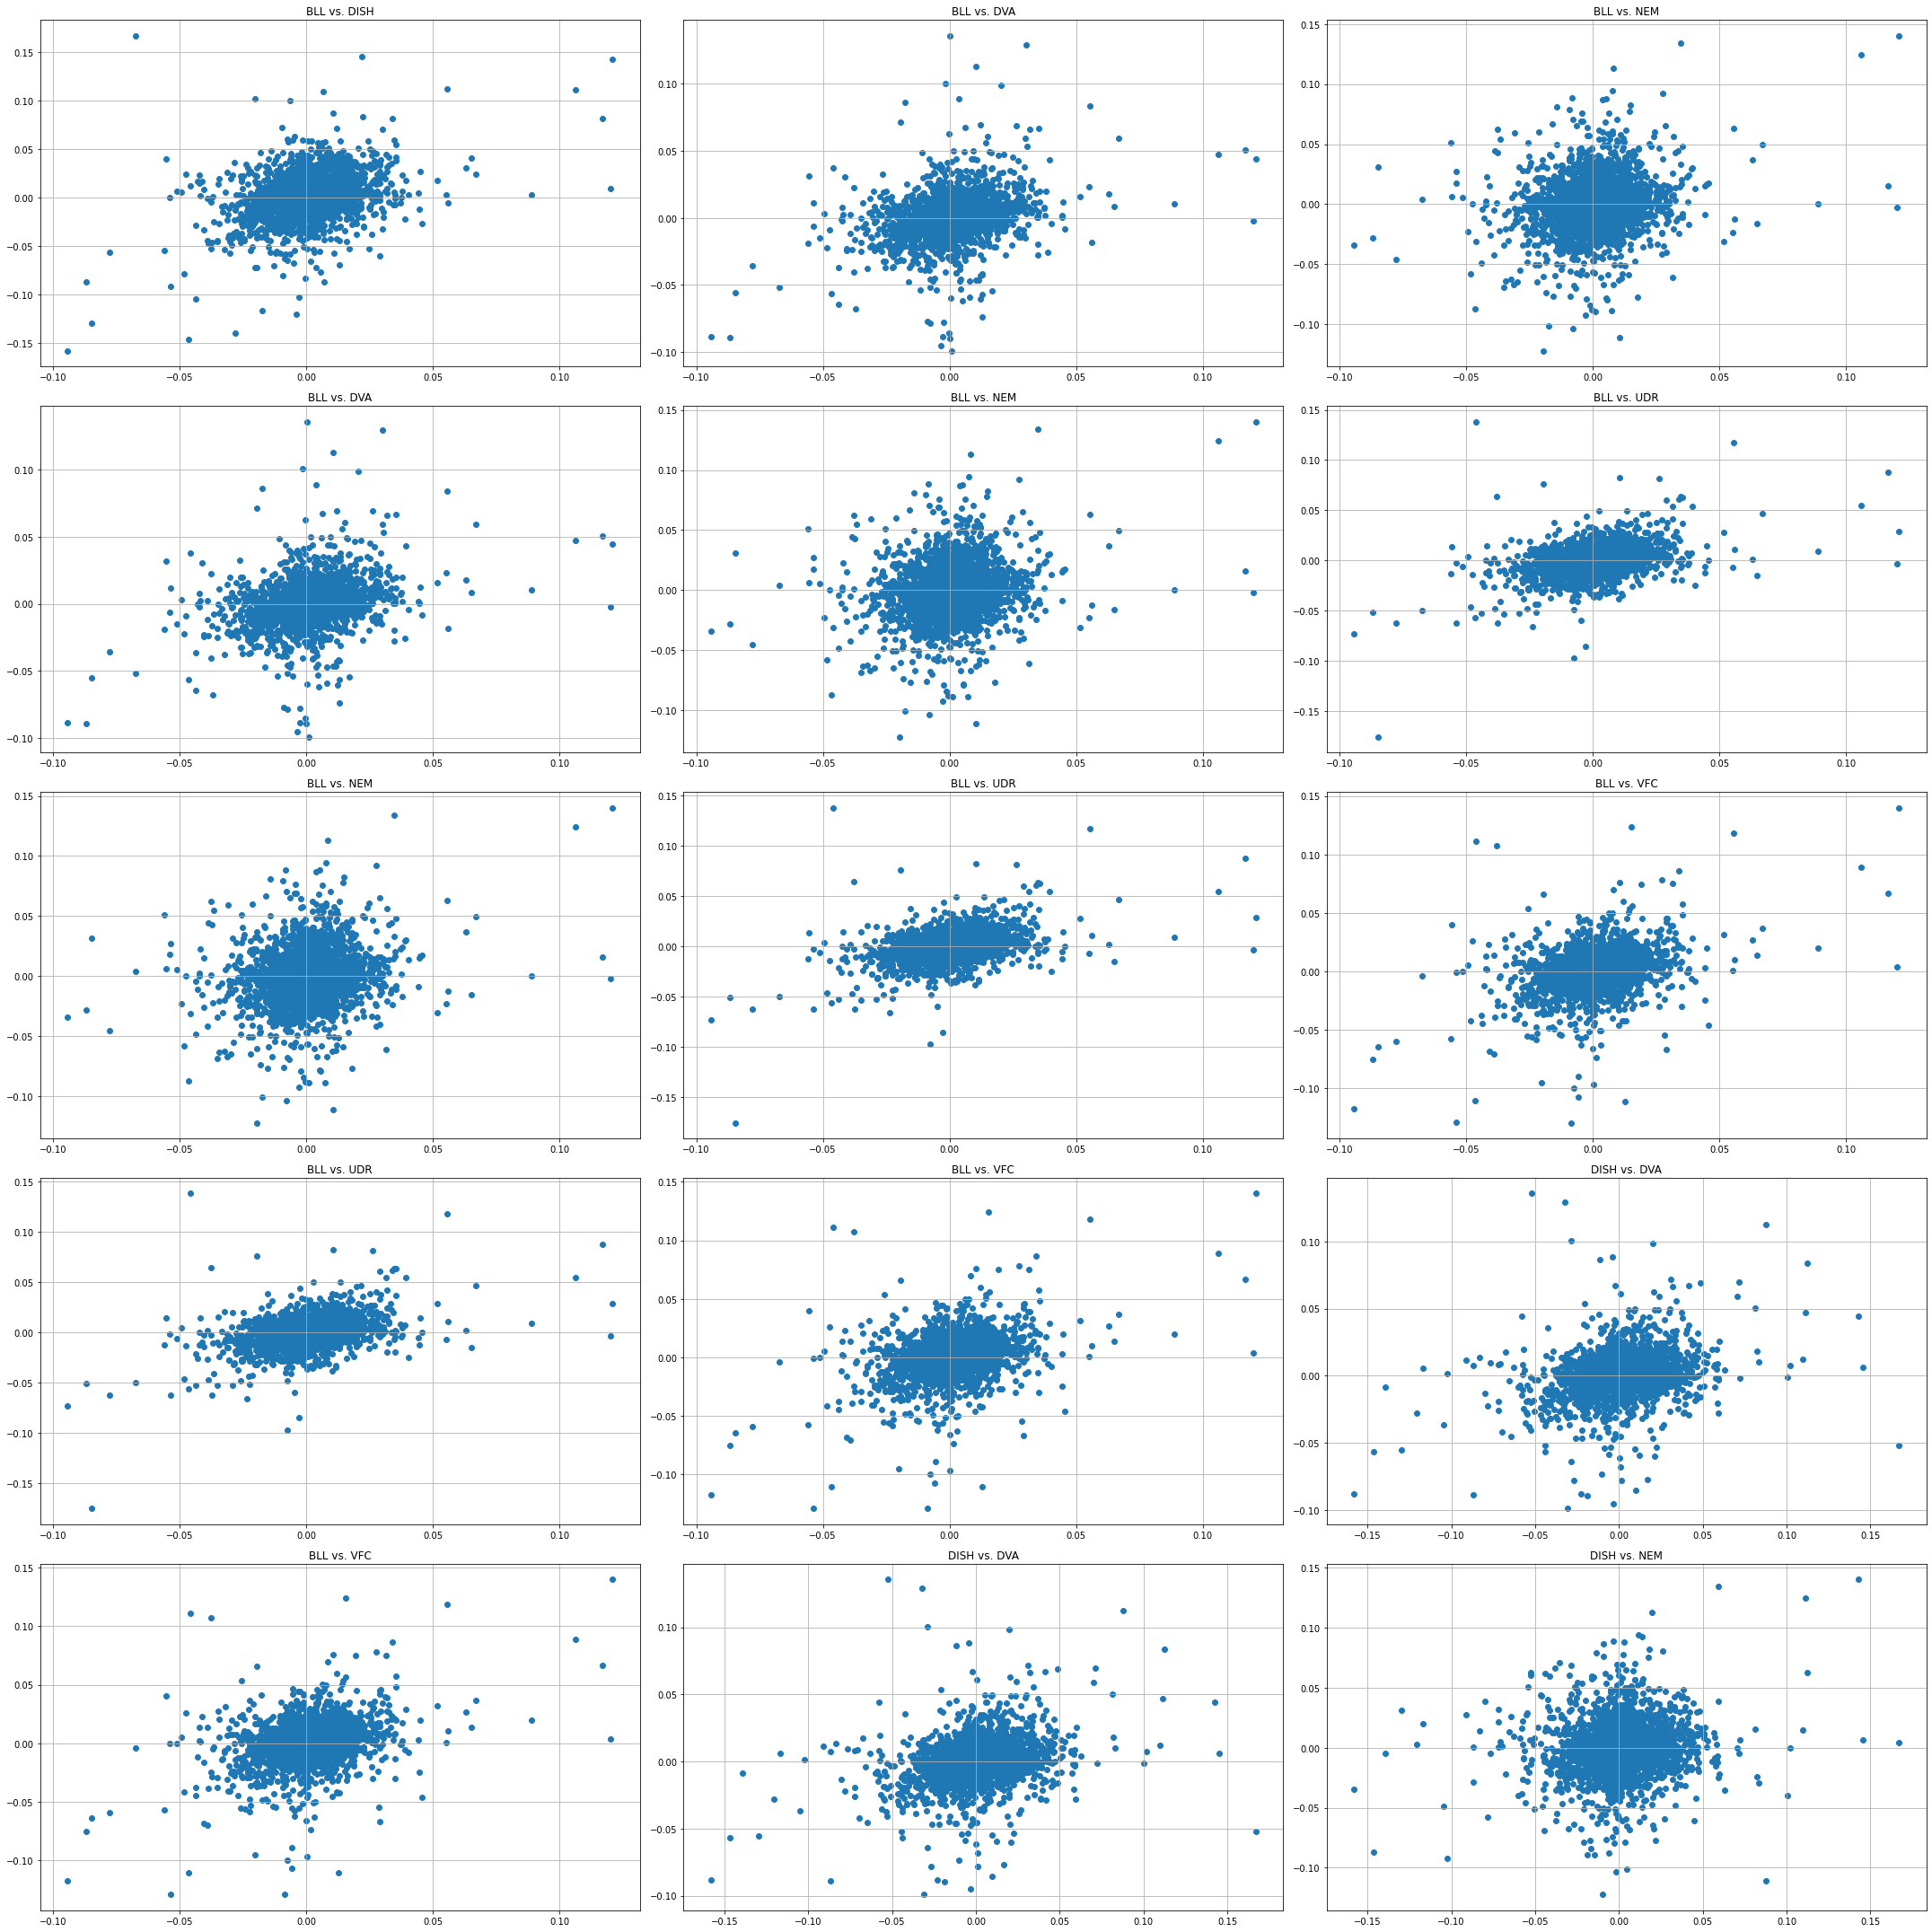

In [28]:
row_count = 5
col_count = 3
fig, axes = plt.subplots(row_count, col_count, figsize = (30,30))

for i in range(5):
    for j in range(3):
        axes[i,j].scatter(prices_returns[combinations[i+j][0]], prices_returns[combinations[i+j][1]])
        axes[i,j].set_title("{} vs. {}".format(combinations[i+j][0], combinations[i+j][1]))
        axes[i,j].grid()
        
plt.tight_layout()
plt.show()

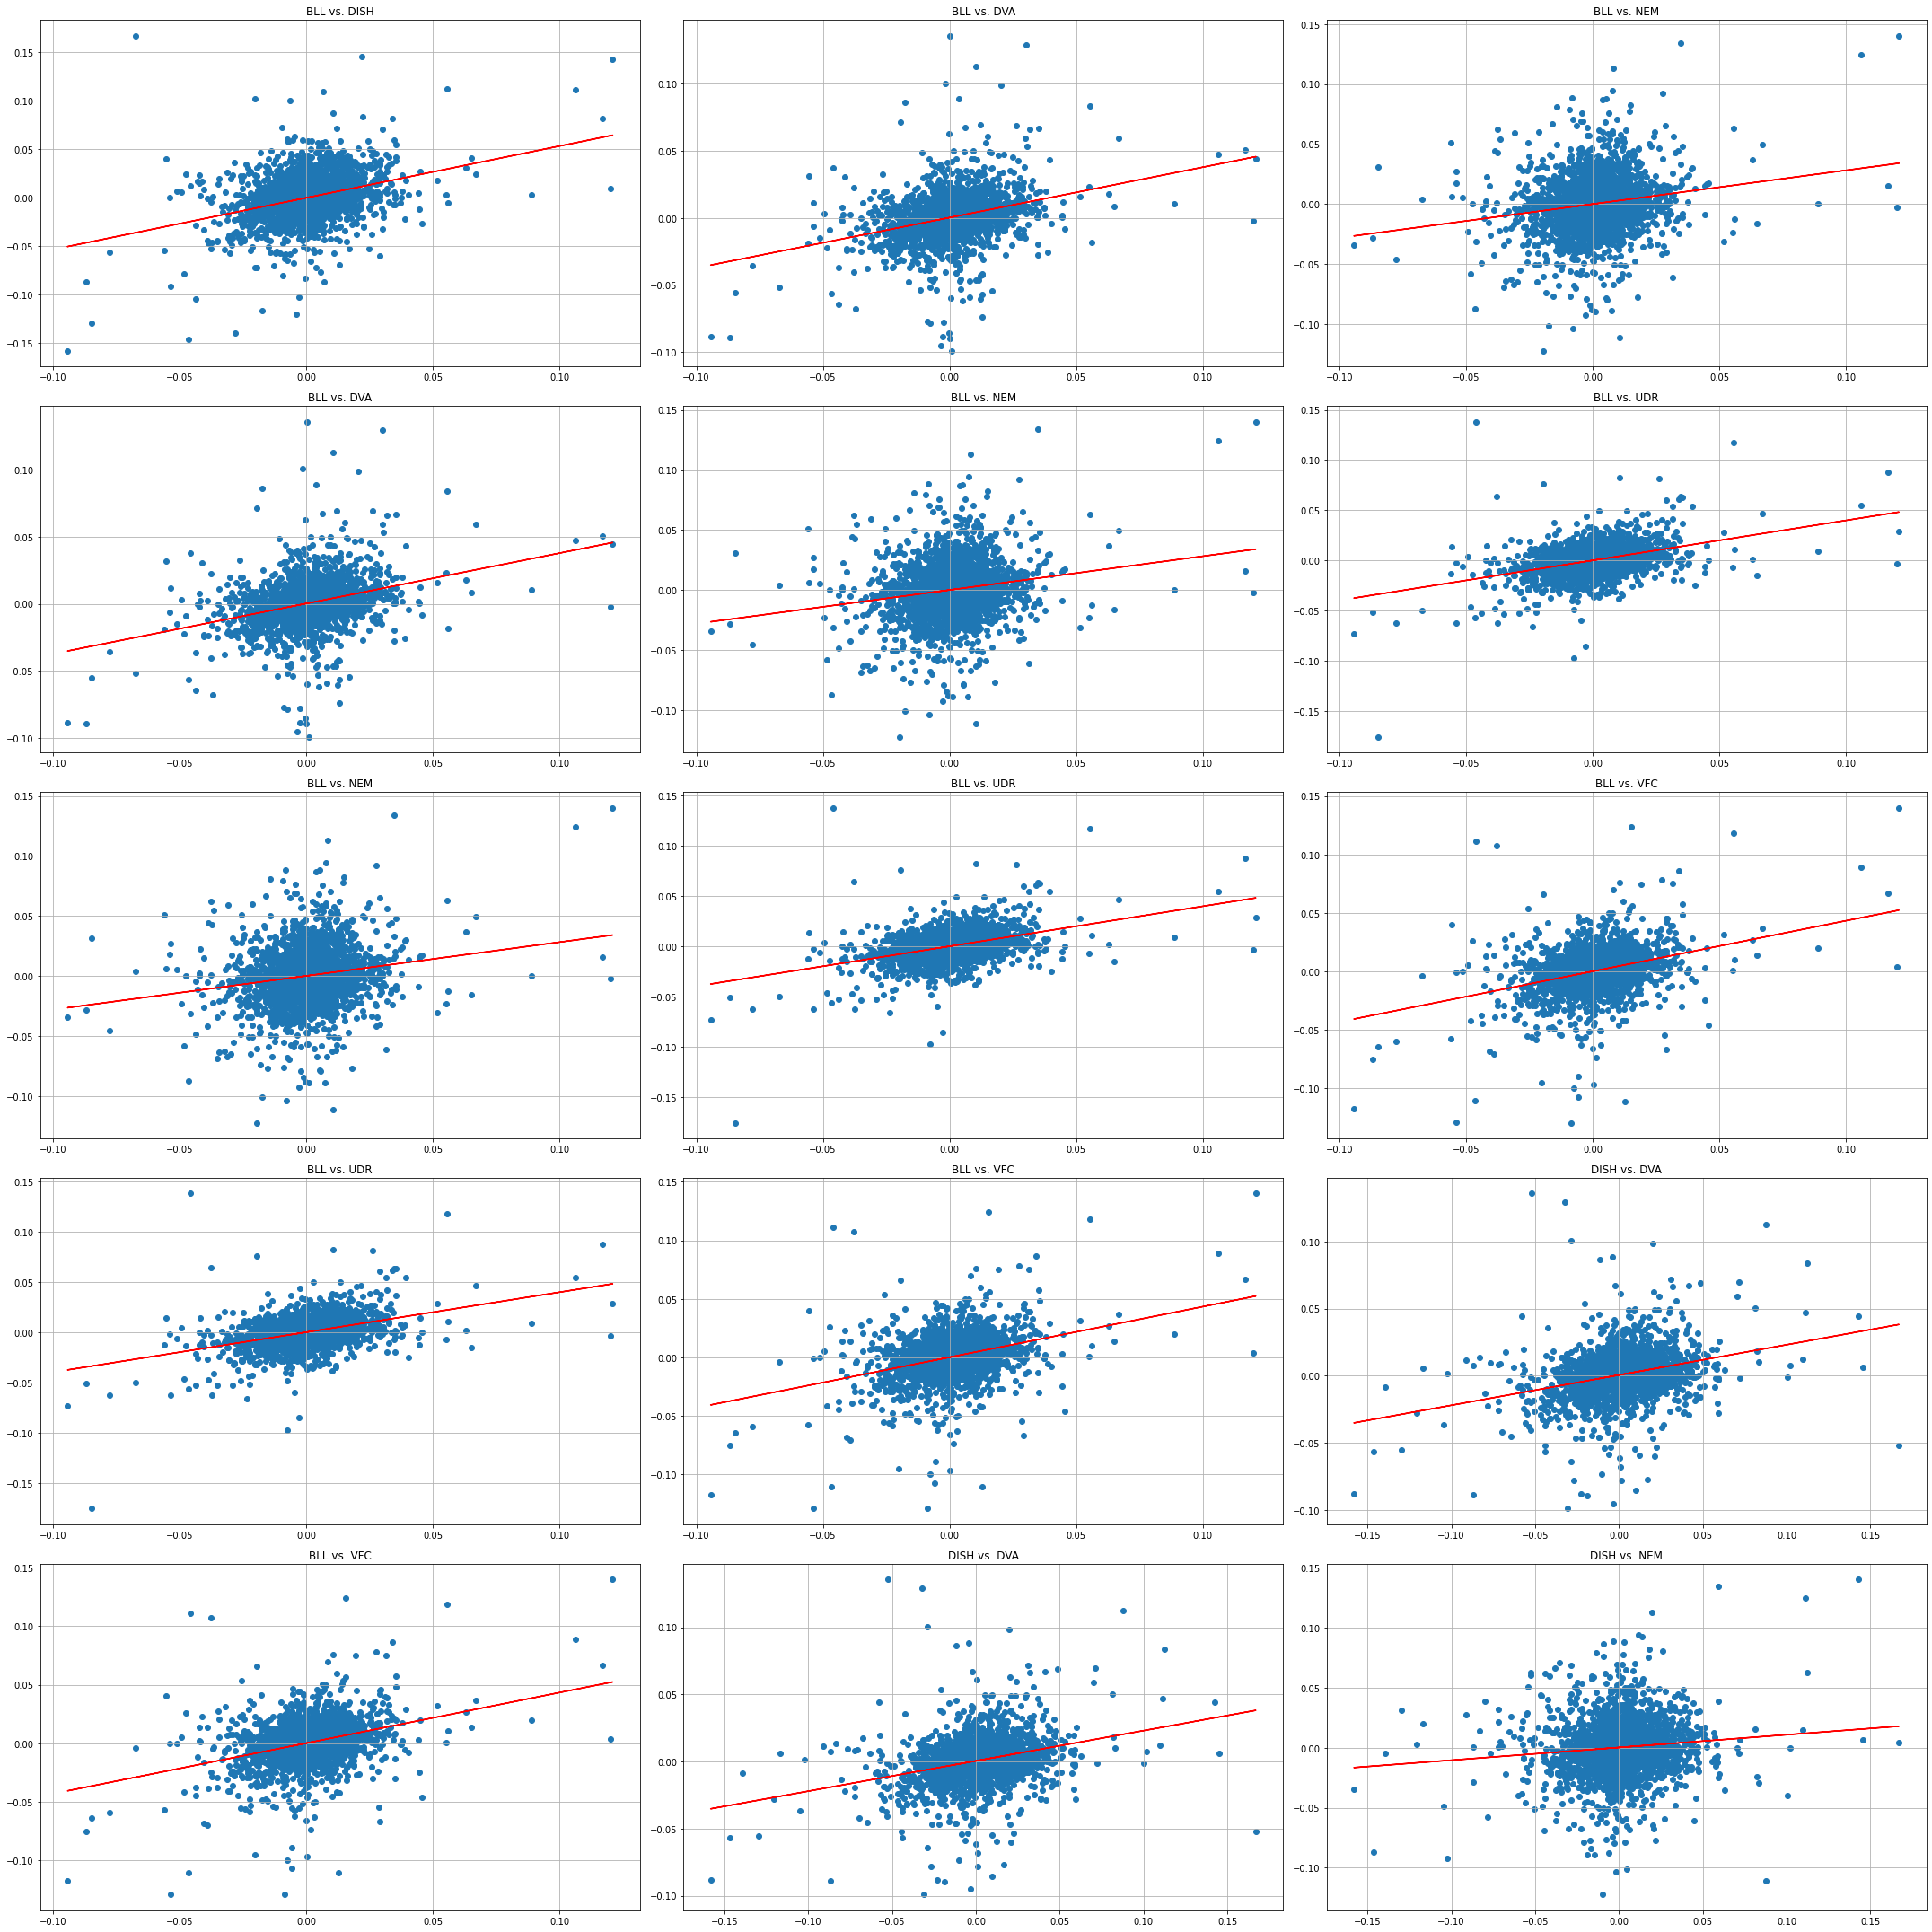

In [29]:
row_count = 5
col_count = 3
fig, axes = plt.subplots(row_count, col_count, figsize = (30,30))

for i in range(5):
    for j in range(3):
        
        x = prices_returns[combinations[i+j][0]]
        y = prices_returns[combinations[i+j][1]]
        
        regression = stats.linregress(x, y)
        
        axes[i,j].plot(x, regression.intercept + regression.slope * x, color = "r")
        axes[i,j].scatter(x, y)
        axes[i,j].set_title("{} vs. {}".format(combinations[i+j][0], combinations[i+j][1]))
        axes[i,j].grid()
        
plt.tight_layout()
plt.show()

In [30]:
#calculating mean, standard deviation, alpha, beta, sharpe

In [31]:
#let's find the average portfolio return
round(portfolio_value[portfolio_value.columns[len(portfolio_value.columns) - 1]].pct_change().mean() * 100,2)

0.05

In [32]:
#let's find the standard deviation of the portfolio's return
round(portfolio_value[portfolio_value.columns[len(portfolio_value.columns) - 1]].pct_change().std(), 2)

0.01

In [33]:
#let's find the covariance matrix of the underlying stocks
prices.cov()

,BLL,DISH,DVA,NEM,UDR,VFC
BLL,515.280961,-115.880197,318.216062,199.017449,159.774249,253.349204
DISH,-115.880197,188.259236,8.913914,-125.679322,-25.809494,-21.198569
DVA,318.216062,8.913914,365.899653,117.196210,91.596221,156.049074
NEM,199.017449,-125.679322,117.196210,190.545804,42.479371,18.455235
UDR,159.774249,-25.809494,91.596221,42.479371,73.331579,102.215343
VFC,253.349204,-21.198569,156.049074,18.455235,102.215343,255.403945


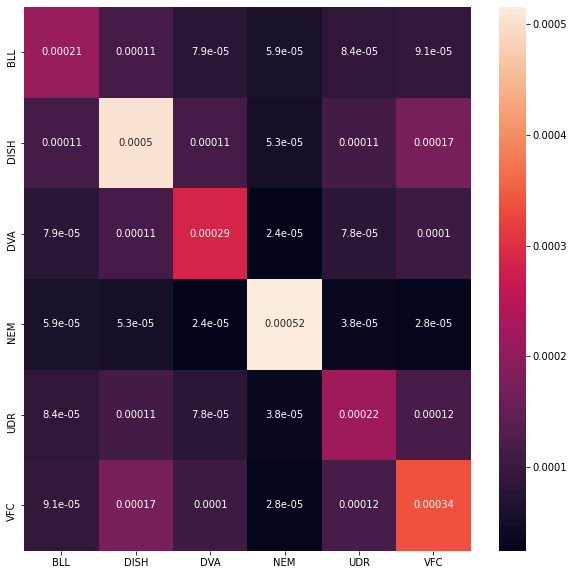

In [34]:
#making it look nicer
plt.figure(figsize = (10,10))
sns.heatmap(prices.pct_change().dropna().cov(), annot = True)
plt.show()

In [35]:
#let's slice to get a full year's worth of trading
#what we want to do is find the first day of trading for 2020 and the last day of trading for 2020
#we'll do that by accessing the 0th value where the year 2020 occurs
#and then find the reference for the first value where the year 2021 occurs and step back by 1 (thus getting us the 2020 value)

#start by looking at our dataset
portfolio_value.head()

,BLL,DISH,DVA,NEM,UDR,VFC,sum
Date,,,,,,,
1/17/2012,16666.666667,16666.666667,16666.666667,16666.666667,16666.666667,16666.666667,100000.000000
1/18/2012,16913.484266,16643.756067,16607.390997,16505.302315,16863.144775,16742.037380,100275.115801
1/19/2012,17119.915300,17176.402188,16882.593801,16300.182288,16720.864964,16719.428595,100919.387135
1/20/2012,17012.207201,16529.209823,16886.826969,16209.929835,16646.340720,16774.704880,100059.219427
1/23/2012,16958.357825,16397.478940,17028.663154,16207.193828,16639.564801,16623.953232,99855.211780


In [36]:
#the problem is we can't use 1/1/2020 and 1/31/2020 because the likelihood that the markets were open that day are pretty small
portfolio_value_date_list = portfolio_value.index[pd.to_datetime(portfolio_value.index).year == 2020].to_list()
start_date = portfolio_value_date_list[0]
end_date = portfolio_value_date_list[len(portfolio_value_date_list) - 1]

print(start_date, end_date)
print(type(start_date), type(end_date))

1/2/2020 12/31/2020
<class 'str'> <class 'str'>


In [37]:
for i in range(len(portfolio_value)):
    
    if portfolio_value.index[i] == start_date:
        
        print("start found")
        start_cut = i
        
    if portfolio_value.index[i] == end_date:
        
        print("end found")
        end_cut = i

start found
end found


In [38]:
portfolio_value_2020 = portfolio_value[start_cut : end_cut]
portfolio_value_2020

,BLL,DISH,DVA,NEM,UDR,VFC,sum
Date,,,,,,,
1/2/2020,61580.890434,21037.930207,31859.941906,13690.728564,40693.743927,63730.202370,232593.437409
1/3/2020,62438.858100,21120.339196,31787.966733,13567.188684,41020.211526,63329.606773,233264.171013
1/6/2020,61860.453858,20979.065039,31986.959577,13703.397095,40931.977528,63081.635816,232543.488913
1/7/2020,61619.448975,20920.202120,31800.667854,13693.896973,40429.045567,62770.080207,231233.341696
1/8/2020,62149.655979,20890.770658,31978.490011,13329.612877,40481.978703,61701.866162,230532.374389
...,...,...,...,...,...,...,...
12/23/2020,88990.332381,18230.124605,48689.612216,19272.712186,33932.111993,55020.750108,264135.643489
12/24/2020,89699.443545,18283.102137,48744.651504,19498.387327,34197.852246,54779.172366,265202.609125
12/28/2020,88757.188588,18795.217864,48880.135473,19285.607763,34839.297600,55791.181296,266348.628584


In [39]:
portfolio_2020_returns = round(100 * portfolio_value_2020["sum"].pct_change().cumsum()[len(portfolio_value_2020) - 1], 2)
print("the portfolio return for 2020 is {}%".format(portfolio_2020_returns))

the portfolio return for 2020 is 20.98%


In [49]:
#let's get the market returns

start_date_2020 = dt.date(2020,1,1)
end_date_2020 = dt.date(2020,12,31)

spx_2020 = yf.download("^GSPC", start_date_2020, end_date_2020)['Close'].to_frame()
spx_2020.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-01-02,3257.850098
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049


In [50]:
#check that we have 252 trading days
spx_2020.shape

(252, 1)

In [51]:
#now we want to add the portfolio value to the spx dataframe
spx_2020["portfolio_value"] = portfolio_value_2020["sum"]
spx_2020.head()

,Close,portfolio_value
Date,,
2020-01-02,3257.850098,232593.437409
2020-01-03,3234.850098,233264.171013
2020-01-06,3246.280029,232543.488913
2020-01-07,3237.179932,231233.341696
2020-01-08,3253.050049,230532.374389


In [52]:
#let's take the percent change and plot it 
spx_2020 = spx_2020.pct_change().dropna()
spx_2020.head()

,Close,portfolio_value
Date,,
2020-01-03,-0.007060,0.002884
2020-01-06,0.003533,-0.003090
2020-01-07,-0.002803,-0.005634
2020-01-08,0.004902,-0.003031
2020-01-09,0.006655,0.006152


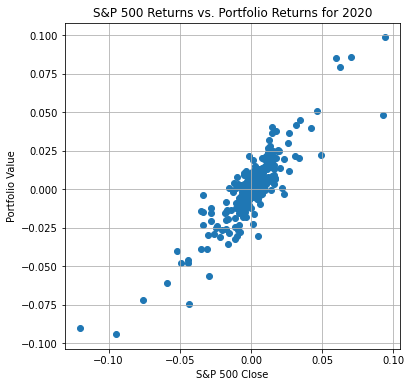

In [57]:
plt.figure(figsize = (6,6))
plt.scatter(spx_2020[spx_2020.columns[0]], spx_2020[spx_2020.columns[1]])
plt.grid()
plt.ylabel("Portfolio Value")
plt.xlabel("S&P 500 Close")
plt.title("S&P 500 Returns vs. Portfolio Returns for 2020")
plt.show()

In [58]:
x = spx_2020[spx_2020.columns[0]]
y = spx_2020[spx_2020.columns[1]]
regression = stats.linregress(x, y)

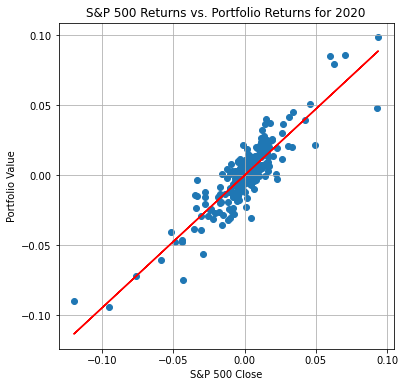

In [60]:
plt.figure(figsize = (6,6))
plt.scatter(spx_2020[spx_2020.columns[0]], spx_2020[spx_2020.columns[1]])
plt.plot(x, regression.intercept + regression.slope * x, color = "r")
plt.grid()
plt.ylabel("Portfolio Value")
plt.xlabel("S&P 500 Close")
plt.title("S&P 500 Returns vs. Portfolio Returns for 2020")
plt.show()

In [63]:
print("portfolio alpha:", round(regression.intercept, 2))
print("portfolio beta:", round(regression.slope, 2))

portfolio alpha: 0.0
portfolio beta: 0.95


In [65]:
import statsmodels.api as sm
from statsmodels import regression
x = sm.add_constant(x)
model = regression.linear_model.OLS(y,x).fit()

In [ ]:
alpha, beta = linreg(X,Y)
print("alpha:", model.)